In [ ]:
#Installing Packages
%matplotlib inline
import numpy as np
import pandas as pd
import nltk


!pip install scikit-plot

import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
#Mounting Drive
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
Mounted at /content/drive/


**Data Preparation**


In [ ]:
#Data Loading
import data_pre_processing as dpp
X_train,Y_train = dpp.get_pre_processed_train_data()

In [ ]:
X_test,Y_test = dpp.get_pre_processed_test_data()

In [ ]:
#Saving Pre-Processed  Training File
X_train.to_csv('X_train.csv')
!cp X_train.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

Y_train.to_csv('Y_train.csv')
!cp Y_train.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

In [ ]:
#Saving Pre-Processed  Test File
X_test.to_csv('X_test.csv')
!cp X_test.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

Y_test.to_csv('Y_test.csv')
!cp Y_test.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

In [ ]:
#Loading Pre-Processed File Exist
import os
file_path_x_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/X_train.csv"
file_path_y_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/Y_train.csv"
if os.path.isfile(file_path_x_train) and os.path.isfile(file_path_y_train) :
  X_train = pd.read_csv(file_path_x_train).fillna(' ')
  Y_train = pd.read_csv(file_path_y_train).fillna(' ')
  X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
  Y_train = Y_train.loc[:, ~Y_train.columns.str.contains('^Unnamed')]
  print('----------Training Data Loaded---------------------')


----------Training Data Loaded---------------------


In [ ]:
#Splitting Data into Train and Validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0, stratify=Y_train)

**Vector Creation**

In [ ]:
#Creating Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_train = vectorizer.fit_transform(X_train['title'] + '' + X_train['text'])

In [ ]:
print(f'No. of Features {len(vectorizer.get_feature_names())}')
#No. of features in word - Two million eight hundred eighty-seven thousand six hundred fourteen

No. of Features 2887614


In [ ]:
#Creating Bag Of Words For Validation
bag_of_words_val = vectorizer.transform(X_val['title'] + '' + X_val['text'])

In [ ]:
#Creating Bag Of Words For Test
bag_of_words_test = vectorizer.transform(X_test['title'] + '' + X_test['text'])

In [ ]:
import joblib
#Saving Model
def save_model(model,filename):
  # save the model to disk
  joblib.dump(model, filename)
  print('Model Saved')

def get_model(filename):
  if os.path.isfile(filename):
    # load the model from disk
    print('Model Exist')
    loaded_model = joblib.load(filename)
    print('Model Loaded')
    return loaded_model
  print('Model does not exist')
  return None

**Training Models**

**1.Naive Bayes**

In [ ]:
#MultinomialNB
base_file_path = 'drive/MyDrive/Colab Notebooks/amazon_reviews_models/BOW/'
# Checking If Model Exist then load it.
multinomial_nb_model_file_path = base_file_path + 'multi_nb_model.sav'
multinomial_nb_model =  get_model(multinomial_nb_model_file_path)
if multinomial_nb_model is None:
  # Build the classifier
  multinomial_nb_model = MultinomialNB()
  #  Train the classifier
  multinomial_nb_model.fit(bag_of_words_train, y_train)
  save_model(multinomial_nb_model,multinomial_nb_model_file_path)

#Graph Plotting Error --Unable to allocate 98.8 TiB for an array with shape (3599999, 3772312) and data type int64

Model Exist
Model Loaded


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
#BernoulliNB
# Checking If Model Exist then load it.
bernoulli_nb_model_file_path = base_file_path + 'bernoulli_nb_model.sav'
bernoulli_nb_model =  get_model(bernoulli_nb_model_file_path)
if bernoulli_nb_model is None:
  # Build the classifier
  bernoulli_nb_model = BernoulliNB()
  #  Train the classifier
  bernoulli_nb_model.fit(bag_of_words_train, y_train)
  save_model(bernoulli_nb_model,bernoulli_nb_model_file_path)

Model Exist
Model Loaded


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator BernoulliNB from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


**Logistic Regression**

In [ ]:
#Logistic Regression
# Checking If Model Exist then load it.
log_reg_model_file_path = base_file_path + 'log_reg_model.sav'
log_reg_model =  get_model(log_reg_model_file_path)
if log_reg_model is None:
  log_reg_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('logisticregression', LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000))])
  log_reg_model.fit(bag_of_words_train, y_train)
  save_model(log_reg_model,log_reg_model_file_path)

Model Exist


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Model Loaded


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
#Hyperparameter Tuning [Updated]
params = {
              'logisticregression__C': [0.1, 1, 10, 100, 1000],
              }
log_reg_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('logisticregression', LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000))])
log_reg_model_cv = GridSearchCV(log_reg_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
log_reg_model_cv.fit(bag_of_words_train[:10000], y_train[:10000])
bestParams = log_reg_model_cv.best_params_
print(f"Logistic Regression Model Best paramters: {bestParams})")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model Best paramters: {'logisticregression__C': 0.1})


**Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC
# Checking If Model Exist then load it.
linear_svc_model_file_path = base_file_path + 'linear_svc_model.sav'
linear_svc_model =  get_model(linear_svc_model_file_path)
if linear_svc_model is None:
  linear_svc_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('linearsvm', LinearSVC(tol=1e-5))])
  linear_svc_model.fit(bag_of_words_train, y_train)
  save_model(linear_svc_model,linear_svc_model_file_path)

Model Exist
Model Loaded


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
#Hyperparameter Tuning [New Addition]
params = {
              'linearsvm__C': [0.1, 1, 10, 100, 1000],
              }
linear_svc_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('linearsvm', LinearSVC(tol=1e-5))])
linear_svc_model_cv = GridSearchCV(linear_svc_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
linear_svc_model_cv.fit(bag_of_words_train[:10000], y_train[:10000])
bestParams = linear_svc_model_cv.best_params_
print(f"Linear SVM Best paramters: {bestParams})")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Best paramters: {'linearsvm__C': 0.1})


**Decision Tree Classifier**

In [ ]:
# Checking If Model Exist then load it.
decision_tree_model_file_path = base_file_path + 'decision_tree_model.sav'
decision_tree_model =  get_model(decision_tree_model_file_path)
if decision_tree_model is None:
  decision_tree_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  decision_tree_model.fit(bag_of_words_train, y_train)
  save_model(decision_tree_model,decision_tree_model_file_path)


Model does not exist
Model Saved


In [ ]:
#Finding Best Hyperparameter For Decision Tree [New Addition]
params = {
 'decisiontreeclassifier__max_depth': [10,15,20],
 'decisiontreeclassifier__min_samples_split': [2,4,6],
 'decisiontreeclassifier__min_samples_leaf':[100,200,300]
}
# Checking If Model Exist then load it.
decision_tree_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('decisiontreeclassifier', DecisionTreeClassifier())])
decision_tree_model_cv = GridSearchCV(decision_tree_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
decision_tree_model_cv.fit(bag_of_words_train[:10000], y_train[:10000])
bestParams = decision_tree_model_cv.best_params_
print(f"Decision Tree Best paramters: {bestParams})")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Decision Tree Best paramters: {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 100, 'decisiontreeclassifier__min_samples_split': 2})


**Random Forest Classifier**

In [ ]:
# Checking If Model Exist then load it.
rf_model_file_path = base_file_path + 'rf_model.sav'
rf_model =  get_model(rf_model_file_path)
if rf_model is None:
  rf_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  rf_model.fit(bag_of_words_train, y_train)
  save_model( rf_model, rf_model_file_path)

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model Saved


In [ ]:
#Finding Best Hyperparameter For Random Forest [New Addition]
params = {
 'randomforestclassifier__max_depth': [10,15,20],
 'randomforestclassifier__min_samples_split': [2,4,6],
 'randomforestclassifier__min_samples_leaf':[100,200,300]
}
rf_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=4,min_samples_leaf=300))])
rf_model_cv = GridSearchCV(rf_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
rf_model_cv.fit(bag_of_words_train[:10000], y_train[:10000])
rf_best_params = rf_model_cv.best_params_
print(f"Random Forest Best paramters: {rf_best_params})")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Random Forest Best paramters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 100, 'randomforestclassifier__min_samples_split': 4})


**Performance Evaluation**

In [ ]:
def report(model,X,Y,modelName,report_type,accuracy_scores):
    YPred = model.predict(X)
    if report_type:
        print(f"{modelName} Training Data Result:\n================================================")
    else:
        print(f"{modelName} Test Data Result:\n================================================")
    model_accuracy_score = accuracy_score(Y, YPred) * 100
    print(f"Accuracy Score: {model_accuracy_score:.2f}%")
    print("_______________________________________________")
    clf_report = pd.DataFrame(classification_report(Y, YPred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    skplt.metrics.plot_confusion_matrix(Y, YPred)
    accuracy_scores.append(model_accuracy_score)


**Training Data Performance**

Multinomial NB Model Training Data Result:
Accuracy Score: 88.33%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.769773e-01  8.898013e-01  0.883282  8.833893e-01  8.833893e-01
recall     8.916444e-01  8.749197e-01  0.883282  8.832821e-01  8.832821e-01
f1-score   8.842501e-01  8.822978e-01  0.883282  8.832739e-01  8.832739e-01
support    1.260000e+06  1.259999e+06  0.883282  2.519999e+06  2.519999e+06


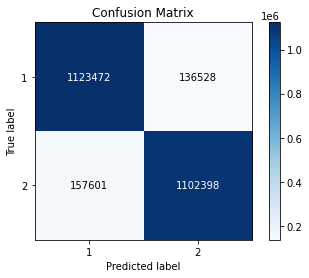

In [ ]:
training_accuracy_scores = []
report(multinomial_nb_model,bag_of_words_train,y_train,'Multinomial NB Model',True,training_accuracy_scores)

Bernoulli NB Model Training Data Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.936719e-01  8.846873e-01  0.889128  8.891796e-01  8.891796e-01
recall     8.833563e-01  8.948991e-01  0.889128  8.891277e-01  8.891277e-01
f1-score   8.884842e-01  8.897639e-01  0.889128  8.891240e-01  8.891240e-01
support    1.260000e+06  1.259999e+06  0.889128  2.519999e+06  2.519999e+06


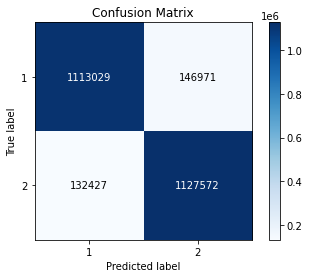

In [ ]:
report(bernoulli_nb_model,bag_of_words_train,y_train,'Bernoulli NB Model',True,training_accuracy_scores)

Logistic NB Model Training Data Result:
Accuracy Score: 99.15%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.918265e-01  9.911922e-01  0.991509  9.915093e-01  9.915093e-01
recall     9.911865e-01  9.918317e-01  0.991509  9.915091e-01  9.915091e-01
f1-score   9.915064e-01  9.915119e-01  0.991509  9.915091e-01  9.915091e-01
support    1.260000e+06  1.259999e+06  0.991509  2.519999e+06  2.519999e+06


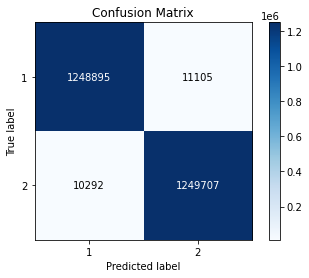

In [ ]:
report(log_reg_model,bag_of_words_train,y_train,'Logistic NB Model',True,training_accuracy_scores)

Linear SVC Model Training Data Result:
Accuracy Score: 95.17%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.540964e-01  9.493076e-01  0.951689  9.517020e-01  9.517020e-01
recall     9.490389e-01  9.543396e-01  0.951689  9.516893e-01  9.516893e-01
f1-score   9.515609e-01  9.518170e-01  0.951689  9.516889e-01  9.516889e-01
support    1.260000e+06  1.259999e+06  0.951689  2.519999e+06  2.519999e+06


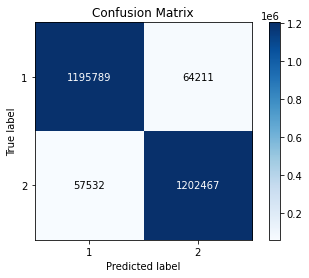

In [ ]:
report(linear_svc_model,bag_of_words_train,y_train,'Linear SVC Model',True,training_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 69.69%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  6.511120e-01  7.826102e-01  0.696927  7.168611e-01  7.168611e-01
recall     8.485198e-01  5.453338e-01  0.696927  6.969268e-01  6.969269e-01
f1-score   7.368228e-01  6.427738e-01  0.696927  6.897983e-01  6.897983e-01
support    1.260000e+06  1.259999e+06  0.696927  2.519999e+06  2.519999e+06


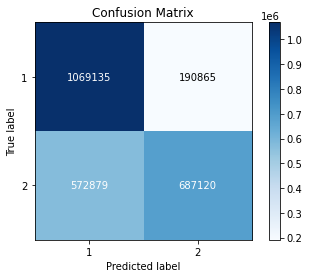

In [ ]:
report(decision_tree_model,bag_of_words_train,y_train,'Decision Tree Model',True,training_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 74.43%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.825534e-01  7.151009e-01  0.744256  7.488271e-01  7.488271e-01
recall     6.764857e-01  8.120260e-01  0.744256  7.442559e-01  7.442559e-01
f1-score   7.256641e-01  7.604876e-01  0.744256  7.430759e-01  7.430759e-01
support    1.260000e+06  1.259999e+06  0.744256  2.519999e+06  2.519999e+06


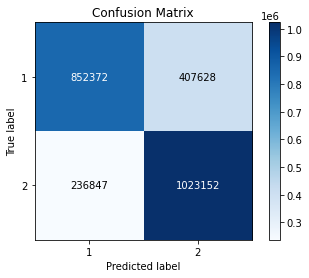

In [ ]:
report(rf_model,bag_of_words_train,y_train,'Random Forest Model',True,training_accuracy_scores)

**Validation Data Performance**

Multinomial NB Model Test Data Result:
Accuracy Score: 84.56%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.839859       0.851627  0.845643  8.457427e-01  8.457427e-01
recall          0.854152       0.837133  0.845643  8.456426e-01  8.456426e-01
f1-score        0.846945       0.844318  0.845643  8.456314e-01  8.456314e-01
support    540000.000000  540000.000000  0.845643  1.080000e+06  1.080000e+06


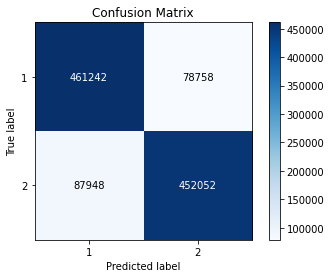

In [ ]:
validation_accuracy_scores = []
report(multinomial_nb_model,bag_of_words_val,y_val,'Multinomial NB Model',False,validation_accuracy_scores)

Bernoulli NB Model Test Data Result:
Accuracy Score: 84.97%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.857439       0.842361  0.849738  8.499004e-01  8.499004e-01
recall          0.838965       0.860511  0.849738  8.497380e-01  8.497380e-01
f1-score        0.848102       0.851340  0.849738  8.497205e-01  8.497205e-01
support    540000.000000  540000.000000  0.849738  1.080000e+06  1.080000e+06


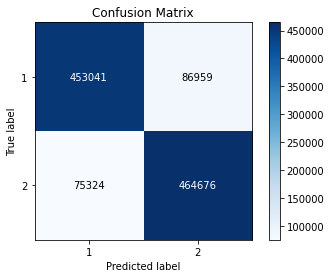

In [ ]:
report(bernoulli_nb_model,bag_of_words_val,y_val,'Bernoulli NB Model',False,validation_accuracy_scores)

Logistic NB Model Test Data Result:
Accuracy Score: 79.75%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.792023       0.803289  0.797549  7.976557e-01  7.976557e-01
recall          0.807011       0.788087  0.797549  7.975491e-01  7.975491e-01
f1-score        0.799447       0.795615  0.797549  7.975309e-01  7.975309e-01
support    540000.000000  540000.000000  0.797549  1.080000e+06  1.080000e+06


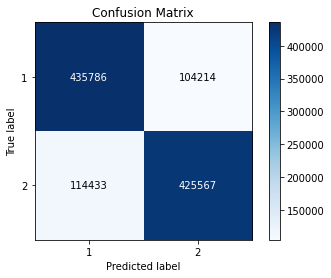

In [ ]:
report(log_reg_model,bag_of_words_val,y_val,'Logistic NB Model',False,validation_accuracy_scores)

Linear SVC Model Test Data Result:
Accuracy Score: 78.83%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.783427       0.793386   0.78832  7.884064e-01  7.884064e-01
recall          0.796954       0.779687   0.78832  7.883204e-01  7.883204e-01
f1-score        0.790132       0.786477   0.78832  7.883046e-01  7.883046e-01
support    540000.000000  540000.000000   0.78832  1.080000e+06  1.080000e+06


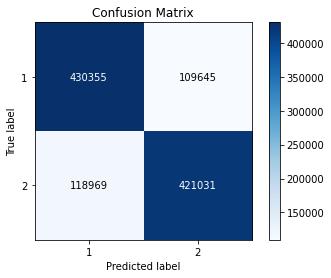

In [ ]:
report(linear_svc_model,bag_of_words_val,y_val,'Linear SVC Model',False,validation_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 69.70%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.651245       0.782347  0.696976  7.167962e-01  7.167962e-01
recall          0.848157       0.545794  0.696976  6.969759e-01  6.969759e-01
f1-score        0.736771       0.643005  0.696976  6.898881e-01  6.898881e-01
support    540000.000000  540000.000000  0.696976  1.080000e+06  1.080000e+06


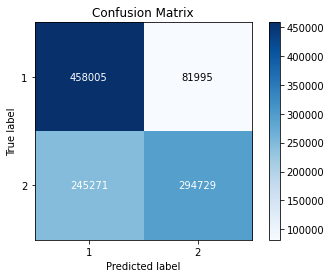

In [ ]:
report(decision_tree_model,bag_of_words_val,y_val,'Decision Tree Model',True,validation_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 74.45%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.782248       0.715590  0.744456  7.489190e-01  7.489190e-01
recall          0.677509       0.811404  0.744456  7.444565e-01  7.444565e-01
f1-score        0.726121       0.760491  0.744456  7.433060e-01  7.433060e-01
support    540000.000000  540000.000000  0.744456  1.080000e+06  1.080000e+06


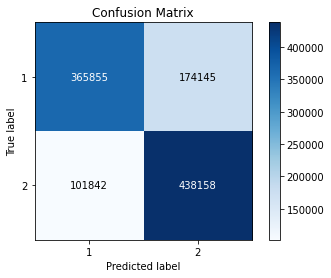

In [ ]:
report(rf_model,bag_of_words_val,y_val,'Random Forest Model',True,validation_accuracy_scores)

In [ ]:
def create_barplot(df,x_label,y_label,x_col,y_col,filename):
    plt.figure(figsize=(12,6),dpi=100)
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_col,y=y_col,data=df,palette="Set2")

    for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

    ax.set(xlabel=x_label, ylabel=y_label)
    ax.tick_params(axis='x', rotation=30)
    plt.setp(ax.patches, linewidth=0)
    # plt.legend(title = 'Team Name', bbox_to_anchor=(1, 1))
    file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/{filename}.png'
    plt.savefig(file_path,bbox_inches = 'tight')
    plt.show()



In [ ]:
print(f'Training Accuracy Score -- {training_accuracy_scores}')
print(f'Validation Accuracy Score -- {validation_accuracy_scores}')

Training Accuracy Score -- [88.32820965405145, 88.91277337808468, 99.15091236147316, 95.16892665433598, 69.69268638598666, 74.42558508951788]
Validation Accuracy Score -- [84.56425925925926, 84.9737962962963, 79.7549074074074, 78.83203703703704, 69.6975925925926, 74.44564814814815]


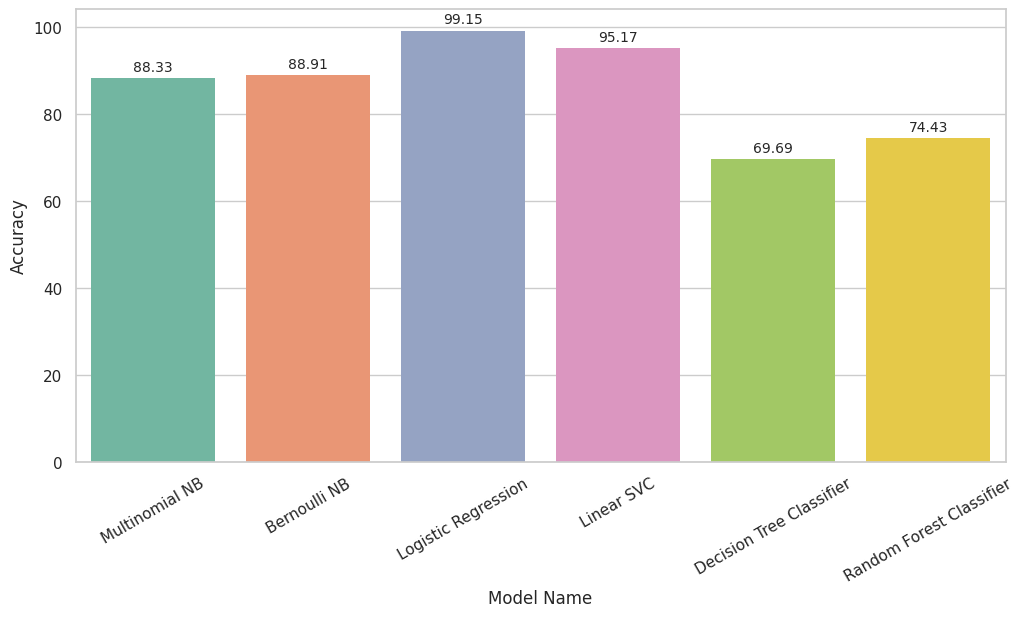

In [ ]:
model_name_list = ['Multinomial NB','Bernoulli NB','Logistic Regression','Linear SVC','Decision Tree Classifier','Random Forest Classifier']
df_train = pd.DataFrame(model_name_list,columns=['model_name'])
df_train['accuracy_score'] = training_accuracy_scores
df_val = pd.DataFrame(model_name_list,columns=['model_name'])
df_val['accuracy_score'] = validation_accuracy_scores
create_barplot(df_train,'Model Name','Accuracy','model_name','accuracy_score','bow_train_accuracy')

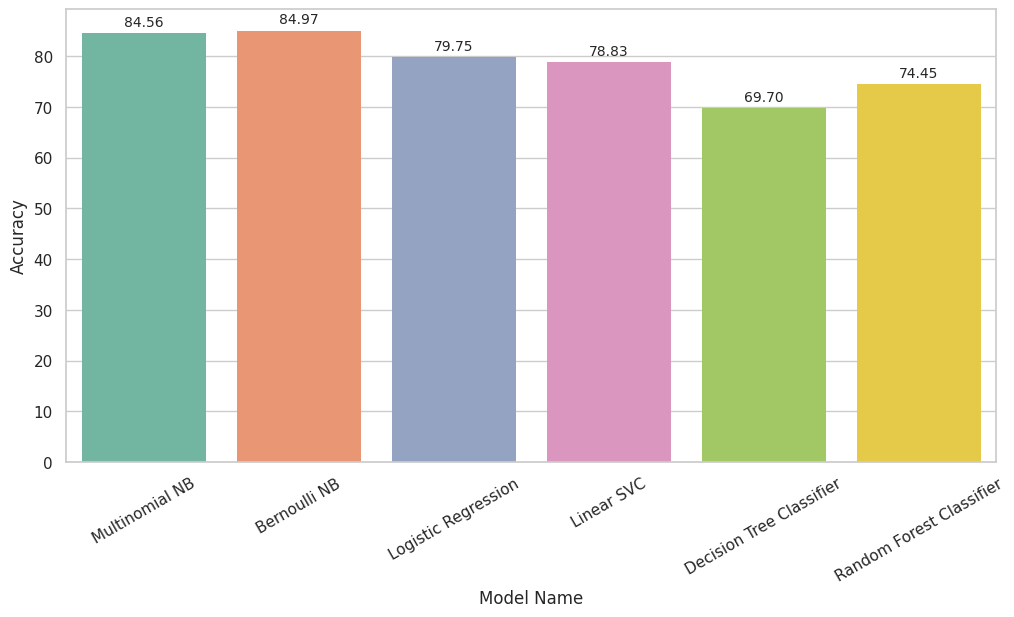

In [ ]:
create_barplot(df_val,'Model Name','Accuracy','model_name','accuracy_score','bow_val_accuracy')

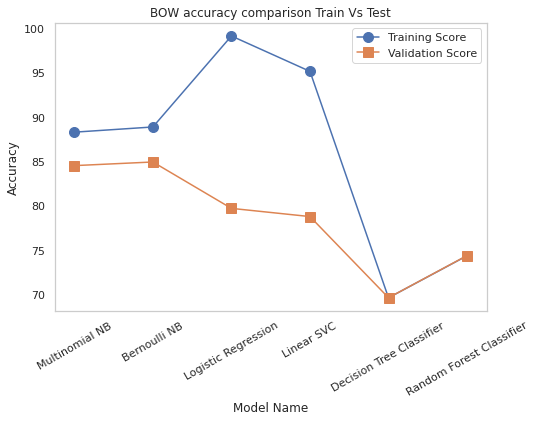

In [ ]:
#Creating Canvas
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Model Name')
ax.set_title('BOW accuracy comparison Train Vs Validation')

#Creating Multiline Plot
ax.plot(model_name_list,training_accuracy_scores, label="Training Score",marker='o',ms=10)
ax.plot(model_name_list,validation_accuracy_scores, label="Validation Score",marker='s',ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/bow_accuracy_comp.png'
plt.savefig(file_path,bbox_inches = 'tight')
plt.show()
plt.close()

**Best Model is Bernoulli NB based on Validation Accuracy Score.**